In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
# Loading dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")

print(df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())   


(2240, 29)
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0   

In [5]:
# Filling missing income with median
df["Income"] = df["Income"].fillna(df["Income"].median())

# Converting Dt_Customer column into datetime (correct format)
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

# Feature: Age
df["Age"] = 2025 - df["Year_Birth"]

# Dropping useless columns
df.drop(["ID", "Z_CostContact", "Z_Revenue"], axis=1, inplace=True)


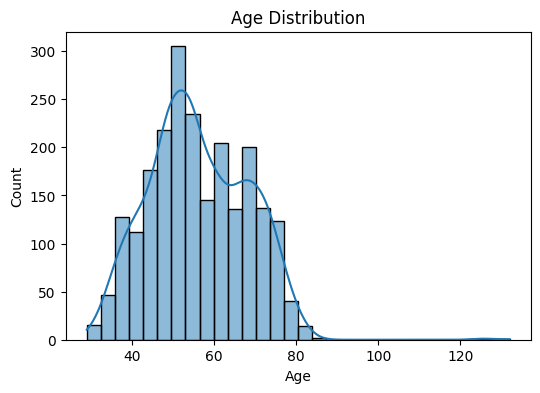

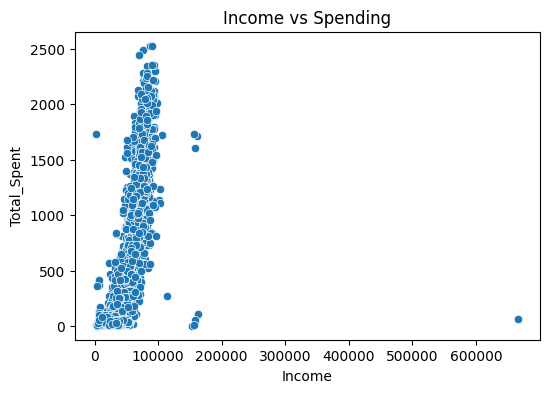

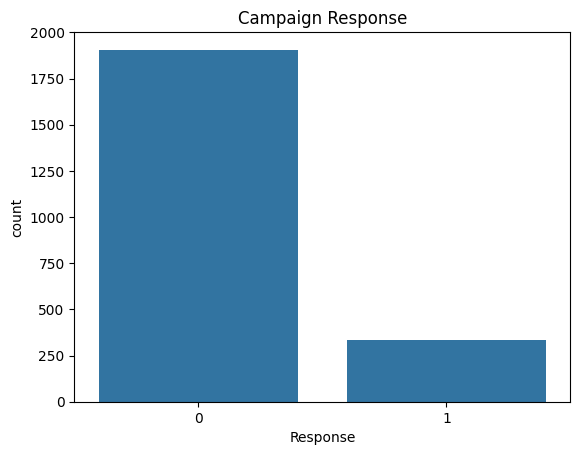

In [6]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Income vs Total Spending
df["Total_Spent"] = df[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum(axis=1)
plt.figure(figsize=(6,4))
sns.scatterplot(x="Income", y="Total_Spent", data=df)
plt.title("Income vs Spending")
plt.show()

# Response Rate
sns.countplot(x="Response", data=df)
plt.title("Campaign Response")
plt.show()


In [ ]:
# Select features for clustering
features = ["Income","Recency","Total_Spent",
            "NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]

X = df[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans (4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# --------------------------
# Step 6: Cluster Visualization
# --------------------------

plt.figure(figsize=(7,5))
sns.scatterplot(x="Income", y="Total_Spent", hue="Cluster", data=df, palette="Set2", alpha=0.7)
plt.title("Customer Segmentation: Income vs Spending")
plt.show()

# --------------------------
# Step 7: Cluster Insights
# --------------------------

cluster_summary = df.groupby("Cluster")[["Income","Age","Total_Spent","Recency"]].mean().round(2)
print("\nCluster Summary:\n", cluster_summary)

# Count customers per cluster
print("\nCluster Counts:\n", df["Cluster"].value_counts())